In [2]:
#Though it works as expected, its loss makes it unviable for forecasting
#usage, trying to optimize...
#TODO 

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import pandas as pd
from predict import date_to_int, train_test_split, create_sequences
from sklearn.preprocessing import MinMaxScaler

TRAIN_RATIO = 0.8
TIMESTEP = 12


In [3]:
df = pd.read_csv('data/yf_monthly/AAPL.csv')
df['Date'] = [date_to_int(date) for date in df['Date']]

X_sc = MinMaxScaler()
scaled_X = X_sc.fit_transform(df)

y_sc = MinMaxScaler()
scaled_y = y_sc.fit_transform(df[['Close']])

In [4]:
X, y = create_sequences(scaled_X, scaled_y, TIMESTEP)
X_train, y_train, X_test, y_test = train_test_split(X, y, TRAIN_RATIO)

In [5]:
def create_model(input_shape):
    
    model = Sequential()
    model.add(LSTM(units=50, input_shape=input_shape, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
        
    return model

In [6]:
model = create_model((X_train.shape[1], X_train.shape[2]))
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20

12/12 [==============================] - 2s 9ms/step - loss: 7.8886e-04
Epoch 2/20
12/12 [==============================] - 0s 8ms/step - loss: 2.0429e-04
Epoch 3/20
12/12 [==============================] - 0s 7ms/step - loss: 1.0049e-04
Epoch 4/20
12/12 [==============================] - 0s 7ms/step - loss: 8.9000e-05
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 6.1146e-05
Epoch 6/20
12/12 [==============================] - 0s 6ms/step - loss: 5.4378e-05
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 5.7893e-05
Epoch 8/20
12/12 [==============================] - 0s 6ms/step - loss: 5.3131e-05
Epoch 9/20
12/12 [==============================] - 0s 7ms/step - loss: 5.6143e-05
Epoch 10/20
12/12 [==============================] - 0s 7ms/step - loss: 4.9986e-05
Epoch 11/20
12/12 [==============================] - 0s 7ms/step - loss: 4.7647e-05
Epoch 12/20
12/12 [==============================] - 0s 6ms/step - loss: 4.6525e-05

In [7]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

3/3 [==============================] - 0s 5ms/step - loss: 0.0222
Test Loss: 0.022165345028042793


In [10]:
import matplotlib.pyplot as plt

scaled_test_predictions = model.predict(X_test)
test_predictions = y_sc.inverse_transform(scaled_test_predictions)

test_targets = y_sc.inverse_transform(y_test)

3/3 [==============================] - 0s 4ms/step


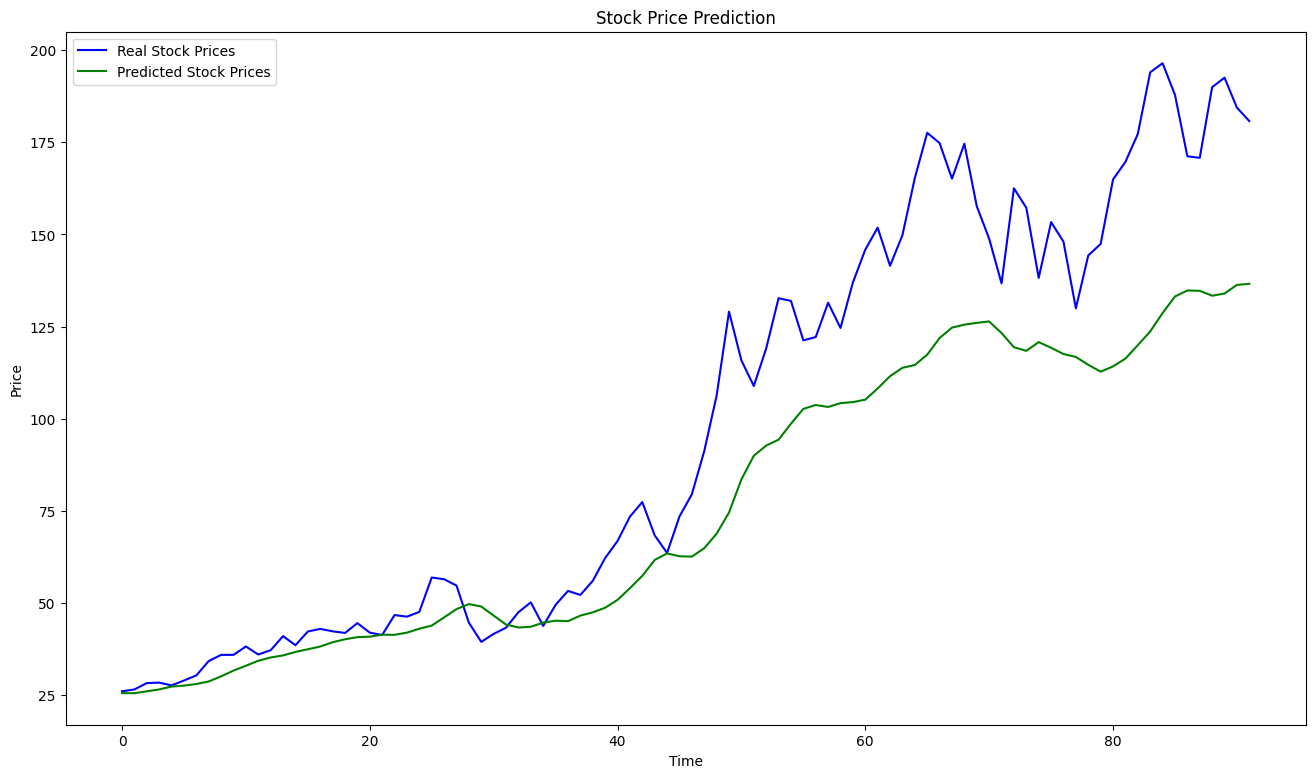

In [12]:
plt.figure(figsize=(16, 9))
plt.plot(test_targets, color = 'blue', label = 'Real Stock Prices')
plt.plot(test_predictions, color = 'green', label = 'Predicted Stock Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()